In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/05_May.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,25.000000,35.000000,1,2,1,2580.0,2455.0,2410.0,2742.0,2967.0,2780.0,2503.083333,2542.0
1,24.833333,35.583333,1,2,1,2569.0,2491.0,2394.0,2722.0,2956.0,2770.0,2514.666667,2533.0
2,24.666667,36.166667,1,2,1,2570.0,2459.0,2433.0,2722.0,2945.0,2775.0,2523.416667,2538.0
3,24.500000,36.750000,1,2,1,2576.0,2534.0,2434.0,2733.0,2922.0,2790.0,2527.916667,2488.0
4,24.333333,37.333333,2,2,1,2542.0,2580.0,2455.0,2713.0,2896.0,2789.0,2533.833333,2526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,34.192450,30.085943,23,6,1,3951.0,3911.0,3809.0,3959.0,3932.0,3833.0,3927.416667,3961.0
8924,34.192450,30.085943,24,6,1,3945.0,3938.0,3858.0,3970.0,3903.0,3766.0,3935.750000,3958.0
8925,34.192450,30.085943,24,6,1,3968.0,3940.0,3849.0,3955.0,3851.0,3754.0,3939.750000,3897.0
8926,33.190000,30.085943,24,6,1,3972.0,3935.0,3901.0,3896.0,3741.0,3683.0,3941.416667,3921.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.063201,-1.539995,-0.402733,-1.660699,-0.988326,0.636625,-0.937881,-1.346869,-1.492156,-0.375191,0.393355,-0.215285,-1.288220
1,-1.092778,-1.576356,-0.355029,-1.660699,-0.988326,0.636625,-0.974023,-1.228629,-1.544679,-0.441050,0.356901,-0.248796,-1.247017
2,-1.076346,-1.612718,-0.307325,-1.660699,-0.988326,0.636625,-0.970738,-1.333731,-1.416653,-0.441050,0.320447,-0.232040,-1.215893
3,-1.240664,-1.649080,-0.259621,-1.660699,-0.988326,0.636625,-0.951023,-1.087399,-1.413371,-0.404828,0.244225,-0.181774,-1.199886
4,-1.115782,-1.685442,-0.211917,-1.516262,-0.988326,0.636625,-1.062737,-0.936316,-1.344434,-0.470687,0.158062,-0.185125,-1.178840


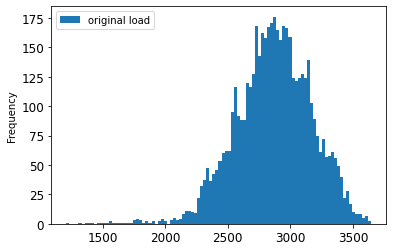

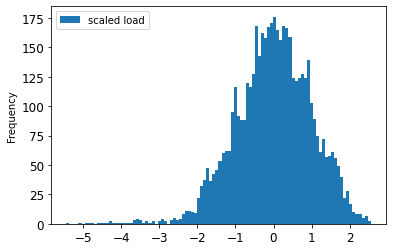

In [9]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

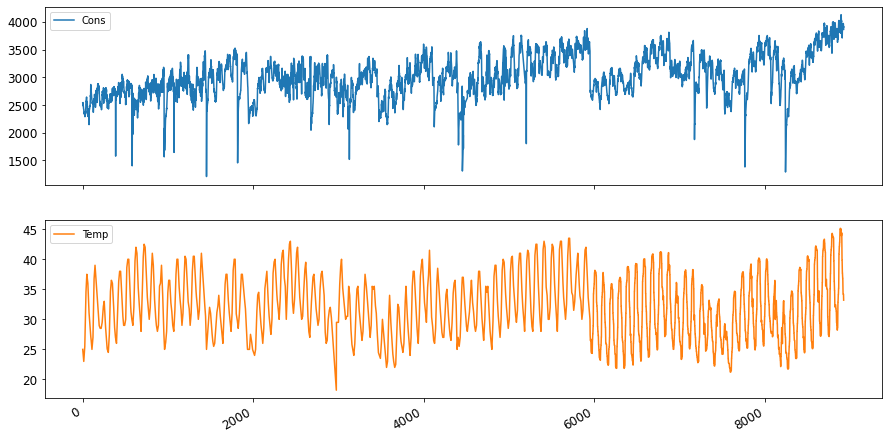

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-1.063201,-1.539995,-0.402733,-1.660699,-0.988326,0.636625,-0.937881,-1.346869,-1.492156,-0.375191,0.393355,-0.215285,-1.288220,-1.092778
1,-1.092778,-1.576356,-0.355029,-1.660699,-0.988326,0.636625,-0.974023,-1.228629,-1.544679,-0.441050,0.356901,-0.248796,-1.247017,-1.076346
2,-1.076346,-1.612718,-0.307325,-1.660699,-0.988326,0.636625,-0.970738,-1.333731,-1.416653,-0.441050,0.320447,-0.232040,-1.215893,-1.240664
3,-1.240664,-1.649080,-0.259621,-1.660699,-0.988326,0.636625,-0.951023,-1.087399,-1.413371,-0.404828,0.244225,-0.181774,-1.199886,-1.115782
4,-1.115782,-1.685442,-0.211917,-1.516262,-0.988326,0.636625,-1.062737,-0.936316,-1.344434,-0.470687,0.158062,-0.185125,-1.178840,-1.181510
5,-1.181510,-1.721804,-0.164213,-1.516262,-0.988326,0.636625,-1.092308,-0.972444,-1.226257,-0.589234,0.095096,-0.389541,-1.174393,-1.217659
6,-1.217659,-1.758166,-0.116509,-1.516262,-0.988326,0.636625,-1.075880,-0.969160,-1.331303,-0.599113,0.078526,-0.356030,-1.163722,-1.227519
7,-1.227519,-1.794528,-0.068805,-1.516262,-0.988326,0.636625,-1.240164,-0.949453,-1.085100,-0.776933,0.055328,-0.433105,-1.176172,-1.303105
8,-1.303105,-1.830890,-0.021101,-1.371824,-0.988326,0.636625,-1.115308,-1.061124,-0.934096,-0.799984,-0.097116,-0.476670,-1.209075,-1.358973
9,-1.358973,-1.867252,0.026603,-1.371824,-0.988326,0.636625,-1.181022,-1.090684,-0.970206,-0.888894,-0.166710,-0.630819,-1.243756,-1.437845


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.063201,-1.539995,-0.402733,-1.660699,-0.988326,0.636625,-0.937881,-1.346869,-1.492156,-0.375191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.063201
1,-1.092778,-1.576356,-0.355029,-1.660699,-0.988326,0.636625,-0.974023,-1.228629,-1.544679,-0.441050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.063201,-1.092778
2,-1.076346,-1.612718,-0.307325,-1.660699,-0.988326,0.636625,-0.970738,-1.333731,-1.416653,-0.441050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.063201,-1.092778,-1.076346
3,-1.240664,-1.649080,-0.259621,-1.660699,-0.988326,0.636625,-0.951023,-1.087399,-1.413371,-0.404828,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.063201,-1.092778,-1.076346,-1.240664
4,-1.115782,-1.685442,-0.211917,-1.516262,-0.988326,0.636625,-1.062737,-0.936316,-1.344434,-0.470687,...,NaN,NaN,NaN,NaN,NaN,-1.063201,-1.092778,-1.076346,-1.240664,-1.115782
5,-1.181510,-1.721804,-0.164213,-1.516262,-0.988326,0.636625,-1.092308,-0.972444,-1.226257,-0.589234,...,NaN,NaN,NaN,NaN,-1.063201,-1.092778,-1.076346,-1.240664,-1.115782,-1.181510
6,-1.217659,-1.758166,-0.116509,-1.516262,-0.988326,0.636625,-1.075880,-0.969160,-1.331303,-0.599113,...,NaN,NaN,NaN,-1.063201,-1.092778,-1.076346,-1.240664,-1.115782,-1.181510,-1.217659
7,-1.227519,-1.794528,-0.068805,-1.516262,-0.988326,0.636625,-1.240164,-0.949453,-1.085100,-0.776933,...,NaN,NaN,-1.063201,-1.092778,-1.076346,-1.240664,-1.115782,-1.181510,-1.217659,-1.227519
8,-1.303105,-1.830890,-0.021101,-1.371824,-0.988326,0.636625,-1.115308,-1.061124,-0.934096,-0.799984,...,NaN,-1.063201,-1.092778,-1.076346,-1.240664,-1.115782,-1.181510,-1.217659,-1.227519,-1.303105
9,-1.358973,-1.867252,0.026603,-1.371824,-0.988326,0.636625,-1.181022,-1.090684,-0.970206,-0.888894,...,-1.063201,-1.092778,-1.076346,-1.240664,-1.115782,-1.181510,-1.217659,-1.227519,-1.303105,-1.358973


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.437845,-1.903614,0.074307,-1.371824,-0.988326,0.636625,-1.217165,-1.074262,-0.966923,-0.915238,...,-1.092778,-1.076346,-1.240664,-1.115782,-1.181510,-1.217659,-1.227519,-1.303105,-1.358973,-1.437845
11,-1.457564,-1.939976,0.122011,-1.371824,-0.988326,0.636625,-1.227022,-1.238483,-0.947227,-0.951460,...,-1.076346,-1.240664,-1.115782,-1.181510,-1.217659,-1.227519,-1.303105,-1.358973,-1.437845,-1.457564
12,-1.470709,-1.976338,0.169715,-1.227387,-0.988326,0.636625,-1.302593,-1.113675,-1.058839,-0.974511,...,-1.240664,-1.115782,-1.181510,-1.217659,-1.227519,-1.303105,-1.358973,-1.437845,-1.457564,-1.470709
13,-1.543009,-1.930886,0.101566,-1.227387,-0.988326,0.636625,-1.358450,-1.179363,-1.088383,-1.083179,...,-1.115782,-1.181510,-1.217659,-1.227519,-1.303105,-1.358973,-1.437845,-1.457564,-1.470709,-1.543009
14,-1.618595,-1.885433,0.033418,-1.227387,-0.988326,0.636625,-1.437306,-1.215492,-1.071970,-1.188554,...,-1.181510,-1.217659,-1.227519,-1.303105,-1.358973,-1.437845,-1.457564,-1.470709,-1.543009,-1.618595


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 10 to 4991
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4982 non-null   float64
 1   Temp           4982 non-null   float64
 2   Hum            4982 non-null   float64
 3   A              4982 non-null   float64
 4   B              4982 non-null   float64
 5   C              4982 non-null   float64
 6   D              4982 non-null   float64
 7   E              4982 non-null   float64
 8   F              4982 non-null   float64
 9   G              4982 non-null   float64
 10  H              4982 non-null   float64
 11  I              4982 non-null   float64
 12  J              4982 non-null   float64
 13  y_t+1          4982 non-null   float64
 14  Cons_t-10      4982 non-null   float64
 15  Cons_t-9       4982 non-null   float64
 16  Cons_t-8       4982 non-null   float64
 17  Cons_t-7       4982 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-1.457564
11,-1.470709
12,-1.543009
13,-1.618595
14,-1.648172
...,...
4987,0.566832
4988,0.422233
4989,0.372937
4990,0.343360


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.437845,-1.437845,-1.358973,-1.303105,-1.227519,-1.217659,-1.181510,-1.115782,-1.240664,-1.076346,...,-1.371824,-0.988326,0.636625,-1.217165,-1.074262,-0.966923,-0.915238,-0.252874,-0.707894,-1.285849
11,-1.457564,-1.457564,-1.437845,-1.358973,-1.303105,-1.227519,-1.217659,-1.181510,-1.115782,-1.240664,...,-1.371824,-0.988326,0.636625,-1.227022,-1.238483,-0.947227,-0.951460,-0.358922,-0.687788,-1.331498
12,-1.470709,-1.470709,-1.457564,-1.437845,-1.358973,-1.303105,-1.227519,-1.217659,-1.181510,-1.115782,...,-1.227387,-0.988326,0.636625,-1.302593,-1.113675,-1.058839,-0.974511,-0.421887,-0.851991,-1.368254
13,-1.543009,-1.543009,-1.470709,-1.457564,-1.437845,-1.358973,-1.303105,-1.227519,-1.217659,-1.181510,...,-1.227387,-0.988326,0.636625,-1.358450,-1.179363,-1.088383,-1.083179,-0.501423,-0.828533,-1.408864
14,-1.618595,-1.618595,-1.543009,-1.470709,-1.457564,-1.437845,-1.358973,-1.303105,-1.227519,-1.217659,...,-1.227387,-0.988326,0.636625,-1.437306,-1.215492,-1.071970,-1.188554,-0.521307,-0.885502,-1.457774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,0.665423,0.665423,0.704859,0.783732,0.875750,0.892182,0.895468,0.852745,0.780446,0.839600,...,1.516927,-0.988326,0.636625,0.892251,0.840557,0.585796,0.217543,0.297249,0.270622,0.860551
4988,0.566832,0.566832,0.665423,0.704859,0.783732,0.875750,0.892182,0.895468,0.852745,0.780446,...,1.661365,-0.988326,0.636625,0.875823,0.781437,0.694125,0.145098,0.313819,0.284027,0.849287
4989,0.422233,0.422233,0.566832,0.665423,0.704859,0.783732,0.875750,0.892182,0.895468,0.852745,...,1.661365,-0.988326,0.636625,0.783823,0.853695,0.759779,0.141805,0.201143,0.126526,0.819052
4990,0.372937,0.372937,0.422233,0.566832,0.665423,0.704859,0.783732,0.875750,0.892182,0.895468,...,1.661365,-0.988326,0.636625,0.704967,0.896392,0.792606,0.062773,0.101724,0.009238,0.781406


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4982, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4982,24,1)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <5952)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,2913.0,28.625000,39.250000,1.0,3.0,1.0,2994.0,3104.0,3125.0,2790.0,2820.0,2771.0,3041.666667
4994,2900.0,28.750000,38.500000,1.0,3.0,1.0,2979.0,3080.0,3138.0,2787.0,2771.0,2756.0,3021.833333
4995,2863.0,28.875000,37.750000,1.0,3.0,1.0,2970.0,3068.0,3137.0,2759.0,2745.0,2731.0,2999.000000
4996,2853.0,29.000000,37.000000,2.0,3.0,1.0,2947.0,3038.0,3132.0,2726.0,2725.0,2683.0,2975.750000
4997,2832.0,29.125000,36.250000,2.0,3.0,1.0,2913.0,2994.0,3104.0,2692.0,2728.0,2686.0,2953.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,3594.0,30.695652,63.304348,23.0,5.0,1.0,3614.0,3628.0,3547.0,3521.0,3331.0,3419.0,3614.500000
5948,3541.0,30.521739,64.478261,24.0,5.0,1.0,3632.0,3626.0,3589.0,3507.0,3295.0,3400.0,3610.500000
5949,3500.0,30.347826,65.652174,24.0,5.0,1.0,3642.0,3620.0,3599.0,3490.0,3273.0,3383.0,3602.250000
5950,3488.0,30.173913,66.826087,24.0,5.0,1.0,3618.0,3607.0,3605.0,3476.0,3285.0,3397.0,3592.500000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-1.822931,-1.587810,1.019613,-1.664588,-0.577752,0.655141,-1.473020,-1.011310,-0.917526,-2.038037,-1.627982,-1.575300,-1.389030
4994,-1.876596,-1.559958,0.953030,-1.664588,-0.577752,0.655141,-1.534673,-1.109938,-0.864055,-2.049899,-1.812602,-1.629112,-1.477934
4995,-2.029336,-1.532107,0.886448,-1.664588,-0.577752,0.655141,-1.571665,-1.159252,-0.868168,-2.160611,-1.910563,-1.718798,-1.580286
4996,-2.070617,-1.504255,0.819865,-1.519992,-0.577752,0.655141,-1.666200,-1.282537,-0.888734,-2.291094,-1.985918,-1.890996,-1.684506
4997,-2.157307,-1.476404,0.753283,-1.519992,-0.577752,0.655141,-1.805947,-1.463356,-1.003902,-2.425530,-1.974615,-1.880234,-1.786110
4998,-2.177947,-1.448552,0.686700,-1.519992,-0.577752,0.655141,-1.859380,-1.524998,-1.102617,-2.449254,-2.008524,-1.934045,-1.880618
4999,-2.289406,-1.420700,0.620118,-1.519992,-0.577752,0.655141,-2.011458,-1.561984,-1.151974,-2.417622,-2.129092,-1.969920,-1.980728
5000,-2.347200,-1.392849,0.553535,-1.375396,-0.577752,0.655141,-2.052560,-1.656503,-1.275368,-2.409714,-2.170537,-2.009382,-2.074862
5001,-2.326559,-1.364997,0.486953,-1.375396,-0.577752,0.655141,-2.138875,-1.796226,-1.456346,-2.322726,-2.189376,-1.998620,-2.150692
5002,-2.252253,-1.337145,0.420370,-1.375396,-0.577752,0.655141,-2.159426,-1.849650,-1.518043,-2.255508,-2.121557,-1.977095,-2.214195


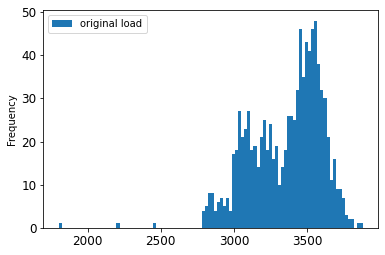

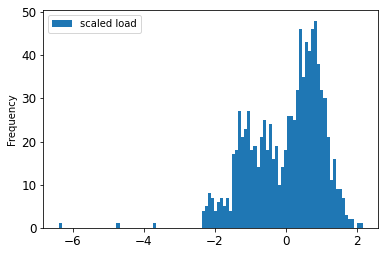

In [21]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5952)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5952)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,-1.822931,-1.587810,1.019613,-1.664588,-0.577752,0.655141,-1.473020,-1.011310,-0.917526,-2.038037,-1.627982,-1.575300,-1.389030,-1.876596
4994,-1.876596,-1.559958,0.953030,-1.664588,-0.577752,0.655141,-1.534673,-1.109938,-0.864055,-2.049899,-1.812602,-1.629112,-1.477934,-2.029336
4995,-2.029336,-1.532107,0.886448,-1.664588,-0.577752,0.655141,-1.571665,-1.159252,-0.868168,-2.160611,-1.910563,-1.718798,-1.580286,-2.070617
4996,-2.070617,-1.504255,0.819865,-1.519992,-0.577752,0.655141,-1.666200,-1.282537,-0.888734,-2.291094,-1.985918,-1.890996,-1.684506,-2.157307
4997,-2.157307,-1.476404,0.753283,-1.519992,-0.577752,0.655141,-1.805947,-1.463356,-1.003902,-2.425530,-1.974615,-1.880234,-1.786110,-2.177947
4998,-2.177947,-1.448552,0.686700,-1.519992,-0.577752,0.655141,-1.859380,-1.524998,-1.102617,-2.449254,-2.008524,-1.934045,-1.880618,-2.289406
4999,-2.289406,-1.420700,0.620118,-1.519992,-0.577752,0.655141,-2.011458,-1.561984,-1.151974,-2.417622,-2.129092,-1.969920,-1.980728,-2.347200
5000,-2.347200,-1.392849,0.553535,-1.375396,-0.577752,0.655141,-2.052560,-1.656503,-1.275368,-2.409714,-2.170537,-2.009382,-2.074862,-2.326559
5001,-2.326559,-1.364997,0.486953,-1.375396,-0.577752,0.655141,-2.138875,-1.796226,-1.456346,-2.322726,-2.189376,-1.998620,-2.150692,-2.252253
5002,-2.252253,-1.337145,0.420370,-1.375396,-0.577752,0.655141,-2.159426,-1.849650,-1.518043,-2.255508,-2.121557,-1.977095,-2.214195,-2.165563


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4993,-1.822931,-1.587810,1.019613,-1.664588,-0.577752,0.655141,-1.473020,-1.011310,-0.917526,-2.038037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.822931
4994,-1.876596,-1.559958,0.953030,-1.664588,-0.577752,0.655141,-1.534673,-1.109938,-0.864055,-2.049899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.822931,-1.876596
4995,-2.029336,-1.532107,0.886448,-1.664588,-0.577752,0.655141,-1.571665,-1.159252,-0.868168,-2.160611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.822931,-1.876596,-2.029336
4996,-2.070617,-1.504255,0.819865,-1.519992,-0.577752,0.655141,-1.666200,-1.282537,-0.888734,-2.291094,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.822931,-1.876596,-2.029336,-2.070617
4997,-2.157307,-1.476404,0.753283,-1.519992,-0.577752,0.655141,-1.805947,-1.463356,-1.003902,-2.425530,...,NaN,NaN,NaN,NaN,NaN,-1.822931,-1.876596,-2.029336,-2.070617,-2.157307
4998,-2.177947,-1.448552,0.686700,-1.519992,-0.577752,0.655141,-1.859380,-1.524998,-1.102617,-2.449254,...,NaN,NaN,NaN,NaN,-1.822931,-1.876596,-2.029336,-2.070617,-2.157307,-2.177947
4999,-2.289406,-1.420700,0.620118,-1.519992,-0.577752,0.655141,-2.011458,-1.561984,-1.151974,-2.417622,...,NaN,NaN,NaN,-1.822931,-1.876596,-2.029336,-2.070617,-2.157307,-2.177947,-2.289406
5000,-2.347200,-1.392849,0.553535,-1.375396,-0.577752,0.655141,-2.052560,-1.656503,-1.275368,-2.409714,...,NaN,NaN,-1.822931,-1.876596,-2.029336,-2.070617,-2.157307,-2.177947,-2.289406,-2.347200
5001,-2.326559,-1.364997,0.486953,-1.375396,-0.577752,0.655141,-2.138875,-1.796226,-1.456346,-2.322726,...,NaN,-1.822931,-1.876596,-2.029336,-2.070617,-2.157307,-2.177947,-2.289406,-2.347200,-2.326559
5002,-2.252253,-1.337145,0.420370,-1.375396,-0.577752,0.655141,-2.159426,-1.849650,-1.518043,-2.255508,...,-1.822931,-1.876596,-2.029336,-2.070617,-2.157307,-2.177947,-2.289406,-2.347200,-2.326559,-2.252253


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5003,-2.165563,-1.309294,0.353788,-1.375396,-0.577752,0.655141,-2.270402,-2.001701,-1.555061,-2.164565,...,-1.876596,-2.029336,-2.070617,-2.157307,-2.177947,-2.289406,-2.347200,-2.326559,-2.252253,-2.165563
5004,-2.116026,-1.281442,0.287205,-1.230800,-0.577752,0.655141,-2.327945,-2.042797,-1.649663,-2.160611,...,-2.029336,-2.070617,-2.157307,-2.177947,-2.289406,-2.347200,-2.326559,-2.252253,-2.165563,-2.116026
5005,-2.169691,-1.142184,0.191030,-1.230800,-0.577752,0.655141,-2.307394,-2.129096,-1.789509,-2.287140,...,-2.070617,-2.157307,-2.177947,-2.289406,-2.347200,-2.326559,-2.252253,-2.165563,-2.116026,-2.169691
5006,-2.190332,-1.002926,0.094856,-1.230800,-0.577752,0.655141,-2.233410,-2.149644,-1.842980,-2.346450,...,-2.157307,-2.177947,-2.289406,-2.347200,-2.326559,-2.252253,-2.165563,-2.116026,-2.169691,-2.190332
5007,-2.025208,-0.863668,-0.001319,-1.230800,-0.577752,0.655141,-2.147095,-2.260600,-1.995166,-2.251554,...,-2.177947,-2.289406,-2.347200,-2.326559,-2.252253,-2.165563,-2.116026,-2.169691,-2.190332,-2.025208


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
5003,-2.116026
5004,-2.169691
5005,-2.190332
5006,-2.025208
5007,-2.128410
...,...
5946,0.988306
5947,0.769516
5948,0.600264
5949,0.550727


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5003,-2.165563,-2.165563,-2.252253,-2.326559,-2.347200,-2.289406,-2.177947,-2.157307,-2.070617,-2.029336,...,-1.375396,-0.577752,0.655141,-2.270402,-2.001701,-1.555061,-2.164565,-2.042434,-1.898171,-2.266492
5004,-2.116026,-2.116026,-2.165563,-2.252253,-2.326559,-2.347200,-2.289406,-2.177947,-2.157307,-2.070617,...,-1.230800,-0.577752,0.655141,-2.327945,-2.042797,-1.649663,-2.160611,-1.997221,-1.962745,-2.305714
5005,-2.169691,-2.169691,-2.116026,-2.165563,-2.252253,-2.326559,-2.347200,-2.289406,-2.177947,-2.157307,...,-1.230800,-0.577752,0.655141,-2.307394,-2.129096,-1.789509,-2.287140,-2.098950,-2.070369,-2.337092
5006,-2.190332,-2.190332,-2.169691,-2.116026,-2.165563,-2.252253,-2.326559,-2.347200,-2.289406,-2.177947,...,-1.230800,-0.577752,0.655141,-2.233410,-2.149644,-1.842980,-2.346450,-2.170537,-2.170818,-2.365482
5007,-2.025208,-2.025208,-2.190332,-2.169691,-2.116026,-2.165563,-2.252253,-2.326559,-2.347200,-2.289406,...,-1.230800,-0.577752,0.655141,-2.147095,-2.260600,-1.995166,-2.251554,-2.140395,-2.177992,-2.365108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5946,1.087380,1.087380,1.186454,1.145173,1.070868,1.041971,1.095636,1.120405,1.128661,1.033715,...,1.516524,0.576548,0.655141,1.046543,1.047554,0.546748,0.895839,0.323710,0.860584,1.161176
5947,0.988306,0.988306,1.087380,1.186454,1.145173,1.070868,1.041971,1.095636,1.120405,1.128661,...,1.516524,0.576548,0.655141,1.075315,1.142073,0.818215,0.852345,0.297336,0.749373,1.178733
5948,0.769516,0.769516,0.988306,1.087380,1.186454,1.145173,1.070868,1.041971,1.095636,1.120405,...,1.661120,0.576548,0.655141,1.149298,1.133854,0.990966,0.796989,0.161697,0.681211,1.160802
5949,0.600264,0.600264,0.769516,0.988306,1.087380,1.186454,1.145173,1.070868,1.041971,1.095636,...,1.661120,0.576548,0.655141,1.190401,1.109197,1.032097,0.729771,0.078806,0.620224,1.123821


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(948, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(948,24,1)
print(X_valid.shape)

(948, 24, 1)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(Conv1D(filters=128, kernel_size=1, padding='causal',activation='relu', dilation_rate=1,input_shape=(24,1)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
model.add(Conv1D(filters=128, kernel_size=2, padding='causal',activation='relu', dilation_rate=2))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(Conv1D(filters=512, kernel_size=1, activation='relu')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add(Bidirectional(LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 128)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 128)           32896     
_________________________________________________________________
time_distributed (TimeDistri (None, 24, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 296,577
Trainable params: 296,577
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
17/17 [==============================] - 7s 433ms/step - loss: 0.3599 - val_loss: 0.1635
Epoch 2/300
17/17 [==============================] - 6s 381ms/step - loss: 0.1304 - val_loss: 0.1163
Epoch 3/300
17/17 [==============================] - 7s 383ms/step - loss: 0.1006 - val_loss: 0.0961
Epoch 4/300
17/17 [==============================] - 7s 388ms/step - loss: 0.0916 - val_loss: 0.0909
Epoch 5/300
17/17 [==============================] - 7s 397ms/step - loss: 0.0893 - val_loss: 0.0850
Epoch 6/300
17/17 [==============================] - 7s 385ms/step - loss: 0.0869 - val_loss: 0.0840
Epoch 7/300
17/17 [==============================] - 7s 384ms/step - loss: 0.0851 - val_loss: 0.0838
Epoch 8/300
17/17 [==============================] - 7s 386ms/step - loss: 0.0859 - val_loss: 0.0800
Epoch 9/300
17/17 [==============================] - 6s 378ms/step - loss: 0.0835 - val_loss: 0.0791
Epoch 10/300
17/17 [==============================] - 6s 378ms/step - loss: 0.0823 - val_lo

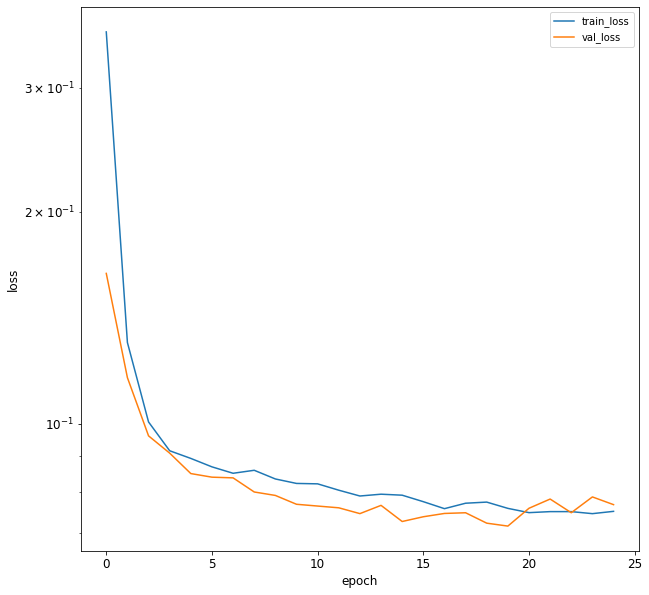

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5953][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5953,2786.0,27.382450,36.383026,1.0,4.0,1.0,2868.0,2892.0,2983.0,2792.0,2758.0,2848.0,2892.583333
5954,2785.0,26.927450,38.385703,1.0,4.0,1.0,2898.0,2904.0,2964.0,2667.0,2735.0,2844.0,2877.666667
5955,2724.0,26.472450,40.388380,1.0,4.0,1.0,2877.0,2931.0,2931.0,2576.0,2720.0,2825.0,2860.416667
5956,2748.0,26.472450,40.388380,2.0,4.0,1.0,2848.0,2896.0,2916.0,2544.0,2672.0,2796.0,2846.416667
5957,2772.0,26.472450,40.388380,2.0,4.0,1.0,2786.0,2868.0,2892.0,2514.0,2695.0,2806.0,2836.416667
5958,2753.0,26.582451,39.518725,2.0,4.0,1.0,2785.0,2898.0,2904.0,2555.0,2691.0,2786.0,2823.833333
5959,2732.0,26.692451,38.649070,2.0,4.0,1.0,2724.0,2877.0,2931.0,2583.0,2685.0,2690.0,2807.250000
5960,2699.0,26.692451,38.649070,3.0,4.0,1.0,2748.0,2848.0,2896.0,2582.0,2674.0,2727.0,2790.833333
5961,2698.0,26.692451,38.649070,3.0,4.0,1.0,2772.0,2786.0,2868.0,2574.0,2657.0,2743.0,2776.666667
5962,2690.0,25.732451,40.723802,3.0,4.0,1.0,2753.0,2785.0,2898.0,2590.0,2651.0,2748.0,2759.333333


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 5953 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2975 non-null   float64
 1   Temp    2975 non-null   float64
 2   Hum     2975 non-null   float64
 3   A       2975 non-null   float64
 4   B       2975 non-null   float64
 5   C       2975 non-null   float64
 6   D       2975 non-null   float64
 7   E       2975 non-null   float64
 8   F       2975 non-null   float64
 9   G       2975 non-null   float64
 10  H       2975 non-null   float64
 11  I       2975 non-null   float64
 12  J       2975 non-null   float64
dtypes: float64(13)
memory usage: 325.4 KB


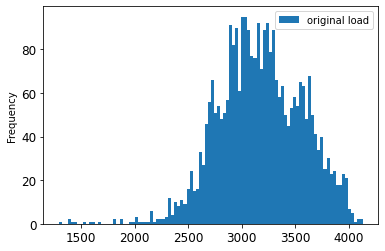

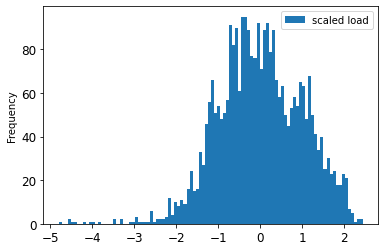

In [36]:
stlf_data[stlf_data.index >= 5953][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5953][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5953,-0.986115,-0.663087,-0.190662,-1.662375,-0.049884,0.639754,-0.774818,-0.711551,-0.475984,-0.907843,-0.966933,-0.649093,-0.735113,-0.988667
5954,-0.988667,-0.743627,-0.066164,-1.662375,-0.049884,0.639754,-0.698095,-0.680786,-0.524813,-1.237942,-1.030547,-0.660543,-0.774578,-1.144357
5955,-1.144357,-0.824167,0.058335,-1.662375,-0.049884,0.639754,-0.751801,-0.611566,-0.609620,-1.478254,-1.072034,-0.714929,-0.820215,-1.083102
5956,-1.083102,-0.824167,0.058335,-1.517869,-0.049884,0.639754,-0.825966,-0.701296,-0.648169,-1.562760,-1.204793,-0.797938,-0.857255,-1.021847
5957,-1.021847,-0.824167,0.058335,-1.517869,-0.049884,0.639754,-0.984527,-0.773080,-0.709847,-1.641984,-1.141179,-0.769314,-0.883711,-1.070340
5958,-1.070340,-0.804696,0.004272,-1.517869,-0.049884,0.639754,-0.987085,-0.696169,-0.679008,-1.533711,-1.152242,-0.826562,-0.917002,-1.123939
5959,-1.123939,-0.785225,-0.049791,-1.517869,-0.049884,0.639754,-1.143088,-0.750006,-0.609620,-1.459769,-1.168837,-1.101352,-0.960876,-1.208165
5960,-1.208165,-0.785225,-0.049791,-1.373364,-0.049884,0.639754,-1.081709,-0.824354,-0.699568,-1.462410,-1.199261,-0.995443,-1.004309,-1.210717
5961,-1.210717,-0.785225,-0.049791,-1.373364,-0.049884,0.639754,-1.020331,-0.983304,-0.771525,-1.483536,-1.246280,-0.949645,-1.041790,-1.231136
5962,-1.231136,-0.955156,0.079186,-1.373364,-0.049884,0.639754,-1.068922,-0.985867,-0.694428,-1.441283,-1.262875,-0.935333,-1.087648,-1.261763


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5953,-0.986115,-0.663087,-0.190662,-1.662375,-0.049884,0.639754,-0.774818,-0.711551,-0.475984,-0.907843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986115
5954,-0.988667,-0.743627,-0.066164,-1.662375,-0.049884,0.639754,-0.698095,-0.680786,-0.524813,-1.237942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986115,-0.988667
5955,-1.144357,-0.824167,0.058335,-1.662375,-0.049884,0.639754,-0.751801,-0.611566,-0.609620,-1.478254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986115,-0.988667,-1.144357
5956,-1.083102,-0.824167,0.058335,-1.517869,-0.049884,0.639754,-0.825966,-0.701296,-0.648169,-1.562760,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.986115,-0.988667,-1.144357,-1.083102
5957,-1.021847,-0.824167,0.058335,-1.517869,-0.049884,0.639754,-0.984527,-0.773080,-0.709847,-1.641984,...,NaN,NaN,NaN,NaN,NaN,-0.986115,-0.988667,-1.144357,-1.083102,-1.021847
5958,-1.070340,-0.804696,0.004272,-1.517869,-0.049884,0.639754,-0.987085,-0.696169,-0.679008,-1.533711,...,NaN,NaN,NaN,NaN,-0.986115,-0.988667,-1.144357,-1.083102,-1.021847,-1.070340
5959,-1.123939,-0.785225,-0.049791,-1.517869,-0.049884,0.639754,-1.143088,-0.750006,-0.609620,-1.459769,...,NaN,NaN,NaN,-0.986115,-0.988667,-1.144357,-1.083102,-1.021847,-1.070340,-1.123939
5960,-1.208165,-0.785225,-0.049791,-1.373364,-0.049884,0.639754,-1.081709,-0.824354,-0.699568,-1.462410,...,NaN,NaN,-0.986115,-0.988667,-1.144357,-1.083102,-1.021847,-1.070340,-1.123939,-1.208165
5961,-1.210717,-0.785225,-0.049791,-1.373364,-0.049884,0.639754,-1.020331,-0.983304,-0.771525,-1.483536,...,NaN,-0.986115,-0.988667,-1.144357,-1.083102,-1.021847,-1.070340,-1.123939,-1.208165,-1.210717
5962,-1.231136,-0.955156,0.079186,-1.373364,-0.049884,0.639754,-1.068922,-0.985867,-0.694428,-1.441283,...,-0.986115,-0.988667,-1.144357,-1.083102,-1.021847,-1.070340,-1.123939,-1.208165,-1.210717,-1.231136


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5963,-1.261763,-1.125086,0.208164,-1.373364,-0.049884,0.639754,-1.122628,-1.142253,-0.748396,-1.404312,...,-0.988667,-1.144357,-1.083102,-1.021847,-1.070340,-1.123939,-1.208165,-1.210717,-1.231136,-1.261763
5964,-1.317914,-1.125086,0.208164,-1.228858,-0.049884,0.639754,-1.207023,-1.080724,-0.822924,-1.449206,...,-1.144357,-1.083102,-1.021847,-1.070340,-1.123939,-1.208165,-1.210717,-1.231136,-1.261763,-1.317914
5965,-1.325571,-1.125086,0.208164,-1.228858,-0.049884,0.639754,-1.209581,-1.019195,-0.982259,-1.425438,...,-1.083102,-1.021847,-1.070340,-1.123939,-1.208165,-1.210717,-1.231136,-1.261763,-1.317914,-1.325571
5966,-1.297495,-1.158718,0.213704,-1.228858,-0.049884,0.639754,-1.230040,-1.067906,-0.984829,-1.544274,...,-1.021847,-1.070340,-1.123939,-1.208165,-1.210717,-1.231136,-1.261763,-1.317914,-1.325571,-1.297495
5967,-1.315362,-1.192351,0.219244,-1.228858,-0.049884,0.639754,-1.260730,-1.121744,-1.141594,-1.560119,...,-1.070340,-1.123939,-1.208165,-1.210717,-1.231136,-1.261763,-1.317914,-1.325571,-1.297495,-1.315362


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5963,-1.317914
5964,-1.325571
5965,-1.297495
5966,-1.315362
5967,-1.399588
...,...
8922,2.012841
8923,2.005184
8924,1.849494
8925,1.910749


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5963,-1.261763,-1.261763,-1.231136,-1.210717,-1.208165,-1.123939,-1.070340,-1.021847,-1.083102,-1.144357,...,-1.373364,-0.049884,0.639754,-1.122628,-1.142253,-0.748396,-1.404312,-1.304362,-0.981131,-1.131522
5964,-1.317914,-1.317914,-1.261763,-1.231136,-1.210717,-1.208165,-1.123939,-1.070340,-1.021847,-1.083102,...,-1.228858,-0.049884,0.639754,-1.207023,-1.080724,-0.822924,-1.449206,-1.334786,-1.115664,-1.173852
5965,-1.325571,-1.325571,-1.317914,-1.261763,-1.231136,-1.210717,-1.208165,-1.123939,-1.070340,-1.021847,...,-1.228858,-0.049884,0.639754,-1.209581,-1.019195,-0.982259,-1.425438,-1.414995,-1.201536,-1.203175
5966,-1.297495,-1.297495,-1.325571,-1.317914,-1.261763,-1.231136,-1.210717,-1.208165,-1.123939,-1.070340,...,-1.228858,-0.049884,0.639754,-1.230040,-1.067906,-0.984829,-1.544274,-1.409463,-1.115664,-1.229852
5967,-1.315362,-1.315362,-1.297495,-1.325571,-1.317914,-1.261763,-1.231136,-1.210717,-1.208165,-1.123939,...,-1.228858,-0.049884,0.639754,-1.260730,-1.121744,-1.141594,-1.560119,-1.409463,-1.147150,-1.244624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,2.040916,2.040916,2.030707,1.972004,1.987318,1.946481,1.959243,1.954138,1.885226,1.859703,...,1.516752,0.980703,0.639754,1.953960,1.875227,1.392350,2.221498,2.249708,2.178954,1.969196
8923,2.012841,2.012841,2.040916,2.030707,1.972004,1.987318,1.946481,1.959243,1.954138,1.885226,...,1.516752,0.980703,0.639754,1.994879,1.900864,1.646772,2.173964,2.280132,2.170367,2.002708
8924,2.005184,2.005184,2.012841,2.040916,2.030707,1.972004,1.987318,1.946481,1.959243,1.954138,...,1.661258,0.980703,0.639754,1.979534,1.970084,1.772698,2.203012,2.199923,1.978587,2.024755
8925,1.849494,1.849494,2.005184,2.012841,2.040916,2.030707,1.972004,1.987318,1.946481,1.959243,...,1.661258,0.980703,0.639754,2.038355,1.975212,1.749569,2.163401,2.056101,1.944238,2.035338


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2964, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2964, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2964,24,1)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-1.2593914],
       [-1.3118728],
       [-1.3095452],
       ...,
       [ 2.0512004],
       [ 1.82545  ],
       [ 1.9597512]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 6762][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3227.222992
dtype: float64
Cons    412.663105
dtype: float64


In [47]:
load_mean=3227.222992
load_std=412.663105
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5963,2683.368574
5964,2680.208851
5965,2691.794503
5966,2684.421815
5967,2649.664858
...,...
8922,4057.848238
8923,4054.688515
8924,3990.440806
8925,4015.718593


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[2707.5186],
       [2685.8613],
       [2686.8218],
       ...,
       [4073.6777],
       [3980.5188],
       [4035.94  ]], dtype=float32)

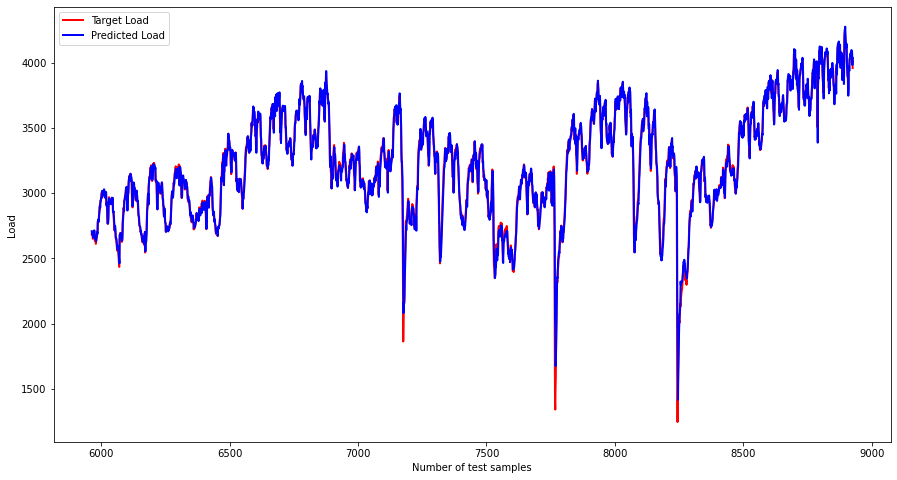

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.1842439893954844


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -0.062872
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5963  268235.957408
5964  267920.674162
5965  269079.635030
5966  268341.596588
5967  264864.918678
...             ...
8922  405683.935848
8923  405368.358772
8924  398941.994738
8925  401472.735890
8926  395677.058591

[2964 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5963   583.221569
5964    31.950502
5965    24.728000
5966   246.544013
5967  1724.210895
...           ...
8922  1298.367377
8923   399.129799
8924  6928.386168
8925  1239.025537
8926  6107.361501

[2964 rows x 1 columns]
y_t+1    3214.501247
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    56.696572
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2964):
    b=a[i]
    print(b)


[2707.5186]
[2685.8613]
[2686.8218]
[2700.1235]
[2691.1885]
[2658.0557]
[2676.6033]
[2673.9207]
[2710.6929]
[2697.0515]
[2714.222]
[2700.456]
[2682.4004]
[2647.5112]
[2670.0479]
[2659.6157]
[2647.005]
[2630.861]
[2650.0632]
[2663.1685]
[2666.9622]
[2701.227]
[2686.3252]
[2702.551]
[2788.8787]
[2786.0828]
[2796.6973]
[2781.441]
[2808.9268]
[2841.9717]
[2866.9543]
[2891.698]
[2909.4539]
[2888.6553]
[2939.454]
[2939.7449]
[2956.2727]
[2957.0566]
[2976.4504]
[2993.9026]
[3016.2534]
[2969.873]
[2987.502]
[3011.062]
[3010.299]
[2996.9363]
[2990.8157]
[3022.429]
[3028.9705]
[3023.6936]
[2994.2473]
[2996.0225]
[2963.4854]
[2972.1624]
[2991.7747]
[2998.687]
[3007.0815]
[2945.5852]
[2900.6357]
[2925.484]
[2898.2134]
[2820.7935]
[2765.7744]
[2772.2742]
[2771.5552]
[2810.983]
[2906.4958]
[2927.9546]
[2958.608]
[2922.4766]
[2939.418]
[2940.1912]
[2930.6914]
[2940.136]
[2930.019]
[2914.0203]
[2938.9893]
[2938.3145]
[2964.733]
[2959.1572]
[2942.8535]
[2963.2627]
[2963.0164]
[2860.258]
[2854.434]
[286

[3704.0256]
[3697.5422]
[3765.2651]
[3739.3584]
[3665.7942]
[3718.7139]
[3764.7915]
[3715.248]
[3724.072]
[3771.8232]
[3685.8584]
[3602.4863]
[3478.1946]
[3461.969]
[3502.529]
[3382.5586]
[3484.842]
[3534.9685]
[3600.244]
[3621.4907]
[3641.638]
[3640.8052]
[3669.9124]
[3657.8096]
[3659.425]
[3629.1802]
[3639.5146]
[3632.1487]
[3665.017]
[3662.925]
[3661.8586]
[3665.382]
[3603.3809]
[3498.2983]
[3501.8088]
[3437.0266]
[3406.7808]
[3323.3708]
[3343.7922]
[3350.0876]
[3300.5483]
[3359.2014]
[3373.5806]
[3361.4958]
[3365.1572]
[3357.2024]
[3373.8018]
[3393.0952]
[3390.6948]
[3362.1597]
[3369.5024]
[3420.1604]
[3410.2097]
[3378.3374]
[3331.7869]
[3267.9448]
[3253.3901]
[3256.3005]
[3253.7334]
[3256.2695]
[3208.99]
[3229.7295]
[3288.468]
[3301.2307]
[3293.7576]
[3309.0303]
[3344.3606]
[3391.3706]
[3398.07]
[3502.112]
[3536.9497]
[3534.9744]
[3560.954]
[3608.7107]
[3597.8225]
[3630.478]
[3632.53]
[3612.0278]
[3629.4326]
[3615.027]
[3628.8157]
[3610.7017]
[3602.4666]
[3557.1028]
[3579.2432]
[3

[2871.5098]
[2906.6606]
[2944.665]
[2943.769]
[2895.998]
[2998.0137]
[3060.2979]
[3082.881]
[3103.868]
[3102.7917]
[3138.855]
[3181.3293]
[3176.4238]
[3179.217]
[3201.408]
[3207.7112]
[3211.7107]
[3172.898]
[3168.3972]
[3180.0427]
[3206.9326]
[3227.6992]
[3256.8489]
[3257.0156]
[3209.7246]
[3158.1428]
[3087.7505]
[3210.208]
[3221.9104]
[3293.0957]
[3294.966]
[3254.507]
[3299.722]
[3395.0015]
[3396.8254]
[3352.806]
[3295.083]
[3308.6724]
[3305.1062]
[3301.1829]
[3195.1865]
[3238.3535]
[3247.9731]
[3234.6978]
[3142.2542]
[3080.7754]
[3059.8892]
[3006.7043]
[3024.3584]
[3139.12]
[3217.0723]
[3255.7358]
[3263.1548]
[3298.897]
[3308.7046]
[3315.6438]
[3335.3645]
[3335.1082]
[3340.842]
[3338.41]
[3365.584]
[3373.0693]
[3344.1003]
[3371.574]
[3322.3057]
[3229.907]
[3243.3643]
[3183.7551]
[3166.0332]
[3122.7642]
[3138.3591]
[3106.6765]
[3095.4763]
[3109.849]
[3095.6084]
[3096.7683]
[3068.237]
[3021.9338]
[3085.6326]
[3098.03]
[3016.1309]
[2966.5093]
[2995.6555]
[3019.2566]
[2965.3552]
[2932.17

[2296.6472]
[2312.914]
[2312.8174]
[2313.1077]
[2323.7266]
[2321.871]
[2335.5178]
[2365.2354]
[2393.7366]
[2438.901]
[2465.521]
[2474.3965]
[2463.385]
[2488.8406]
[2486.9192]
[2468.5957]
[2461.5928]
[2410.1401]
[2394.5762]
[2395.6082]
[2379.2385]
[2374.707]
[2379.9077]
[2344.6172]
[2386.3018]
[2394.2732]
[2408.968]
[2432.597]
[2493.2036]
[2532.266]
[2575.9238]
[2591.083]
[2662.643]
[2738.0117]
[2772.9543]
[2802.1692]
[2820.2607]
[2845.275]
[2829.1404]
[2820.3784]
[2860.2393]
[2899.4624]
[2916.9714]
[2937.8525]
[2883.2732]
[2858.2568]
[2895.527]
[2945.2903]
[2992.3743]
[3036.3367]
[3072.56]
[3066.9724]
[3096.312]
[3117.8413]
[3133.0432]
[3137.6985]
[3137.8599]
[3158.0376]
[3174.2527]
[3113.9343]
[3133.7517]
[3203.3757]
[3129.321]
[3150.4102]
[3163.649]
[3142.3967]
[3122.0635]
[3139.63]
[3132.5632]
[3156.7136]
[3132.392]
[3078.7673]
[3036.93]
[3015.1772]
[2995.4604]
[2928.9678]
[2940.8235]
[3056.8848]
[3139.1155]
[3166.163]
[3167.1897]
[3191.5916]
[3209.0662]
[3255.1692]
[3252.842]
[3251